In [108]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
import matplotlib.pyplot as plt

In [109]:
np.random.seed(0)

In [110]:
n=15
x=np.linspace(0,10,n)+np.random.randn(n)/5 #The NumPy linspace function is a tool in Python for creating numeric sequences
# 0 is staring value,10 is end, 'n' tells you how much values to be generated
y=np.sin(x)+x/6+np.random.randn(n)/10

X_train,X_test,y_train,y_test= train_test_split(x,y,random_state=0)

In [111]:
x

array([ 0.35281047,  0.79431716,  1.62431903,  2.59103578,  3.23065446,
        3.375973  ,  4.47573197,  4.96972856,  5.69364194,  6.51069113,
        7.17166586,  8.14799756,  8.72363612,  9.31004929, 10.08877265])

In [112]:
y


array([ 0.43770571,  0.99517935,  1.24877201,  0.98630796,  0.36408873,
        0.07512287, -0.16081   , -0.05233879,  0.3187423 ,  1.53763897,
        1.82595557,  2.31966323,  2.08031157,  1.81942995,  1.21213026])

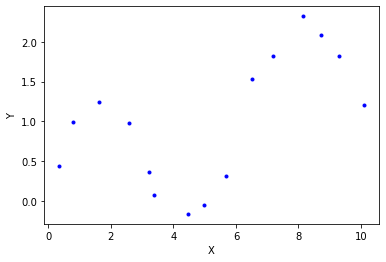

In [113]:
plt.plot(x, y, 'b.')
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

In [114]:
X_train= X_train.reshape(-1, 1)

X_test = X_test.reshape(-1, 1)


In [115]:
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
print(r2_score(y_test, y_pred))

-0.45237104233936676


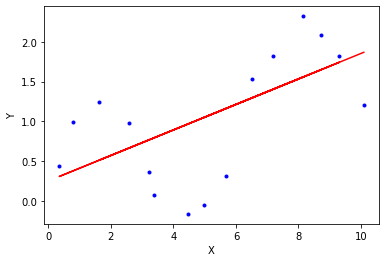

In [116]:
plt.plot(X_train, lr.predict(X_train), color="r")
plt.plot(x, y, "b.")
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

#### Polynomial Features: if a dataset had one input feature X, then a polynomial feature would be the addition of a new feature (column) where values were calculated by squaring the values in X, e.g. X^2.The “degree” of the polynomial is used to control the number of features added, e.g. a degree of 3 will add two new variables for each input variable. Typically a small degree is used such as 2 or 3

In [117]:
#Q1
def Q1():
    degree=[1,3,6,9]
    for i in degree:
        poly = PolynomialFeatures(degree=i, include_bias=True)
        x_train_trans = poly.fit_transform(X_train)
        x_test_trans = poly.transform(X_test)
        #include bias parameter
        lr = LinearRegression()
        lr.fit(x_train_trans, y_train)
        y_pred = lr.predict(x_test_trans)
        print('Prediction Score for degree',i,'is',r2_score(y_test, y_pred))
        print('Coefficents used for equation are',lr.coef_)
        print('Used value of intercept',lr.intercept_)
        
        X_new = np.linspace(0, 10, 100).reshape(100, 1)
        X_new_poly = poly.transform(X_new)
        y_new = lr.predict(X_new_poly)
        #print('100 Predicted values over range 0 to 10',y_new)
        plt.plot(X_new, y_new, "r-", linewidth=2, label="Predictions")
        plt.plot(X_train, y_train, "b.",label='Training points')
        plt.plot(X_test, y_test, "g.",label='Testing points')
        plt.xlabel("X")
        plt.ylabel("y")
        plt.legend()
        plt.show()

Prediction Score for degree 1 is -0.45237104233936676
Coefficents used for equation are [0.         0.15999738]
Used value of intercept 0.25304019532187616


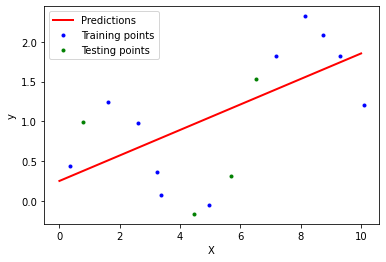

Prediction Score for degree 3 is 0.005331052945739101
Coefficents used for equation are [ 0.         -0.79802899  0.2120088  -0.01285893]
Used value of intercept 1.2298953897098268


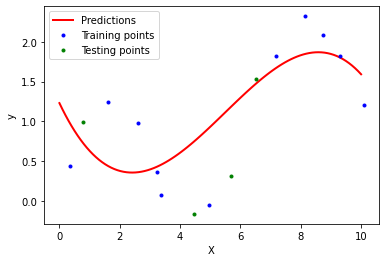

Prediction Score for degree 6 is 0.9214093981378233
Coefficents used for equation are [ 0.00000000e+00  1.99160182e+00 -5.28148359e-01 -1.83316577e-01
  7.90001503e-02 -9.05559396e-03  3.33228328e-04]
Used value of intercept -0.1995543104204407


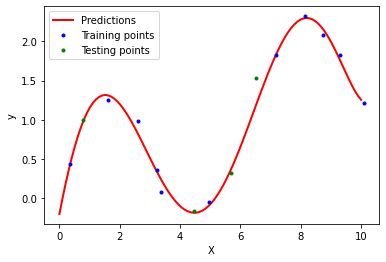

Prediction Score for degree 9 is -0.6452477727050785
Coefficents used for equation are [ 0.00000000e+00 -3.04673741e+01  4.46737134e+01 -3.03484317e+01
  1.14618596e+01 -2.61503397e+00  3.69696188e-01 -3.16767305e-02
  1.50592797e-03 -3.04565300e-05]
Used value of intercept 6.795006116721337


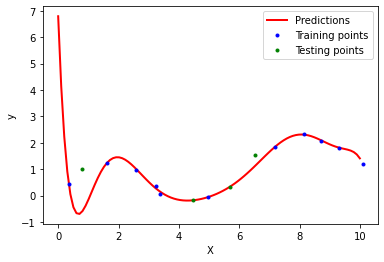

In [118]:
Q1()

In [172]:
def Q2():
    c=[]
    d=[]
    for i in range(0,10):
        poly = PolynomialFeatures(degree=i, include_bias=True)
        x_train_trans = poly.fit_transform(X_train)
        x_test_trans = poly.transform(X_test)
                    #include bias parameter
        lr = LinearRegression()
        lr.fit(x_train_trans, y_train)
        y_pred_test = lr.predict(x_test_trans)
        y_pred_train = lr.predict(x_train_trans)
        a=r2_score(y_train, y_pred_train)
        c.append(a)
        b=r2_score(y_test, y_pred_test)
        d.append(b)
        
    #print('Training score is',c)
    #print('Training score is',d)
    print('Tuple of two lists',list(zip(c, d)))

        #return(a,b)
        

In [173]:
Q2()

Tuple of two lists [(0.0, -0.4780864173714179), (0.4292457781234663, -0.45237104233936676), (0.45109980444082465, -0.06856984149916023), (0.587199536877985, 0.005331052945739101), (0.9194194471769304, 0.7300494281868042), (0.975786414306821, 0.8770830091492043), (0.9901823324795086, 0.9214093981378233), (0.9935250927840401, 0.9202150411626775), (0.9963754538774162, 0.6324795007430362), (0.9980370625662136, -0.6452477727050785)]


In [32]:
#Q3

In [175]:
def Q3():
    c=[]
    d=[]
    for i in range(0,10):
        poly = PolynomialFeatures(degree=i, include_bias=True)
        x_train_trans = poly.fit_transform(X_train)
        x_test_trans = poly.transform(X_test)
                    #include bias parameter
        lr = LinearRegression()
        lr.fit(x_train_trans, y_train)
        y_pred_test = lr.predict(x_test_trans)
        y_pred_train = lr.predict(x_train_trans)
        
        
        X_new = np.linspace(0, 10, 100).reshape(100, 1)
        X_new_poly = poly.transform(X_new)
        y_new = lr.predict(X_new_poly)
        #print('100 Predicted values over range 0 to 10',y_new)
        plt.plot(X_new, y_new, "r-", linewidth=2, label="Predictions")
        plt.plot(X_train, y_train, "b.",label='Training points')
        plt.plot(X_test, y_test, "g.",label='Testing points')
        plt.xlabel("X")
        plt.ylabel("y")
        plt.legend()
        plt.show()
       

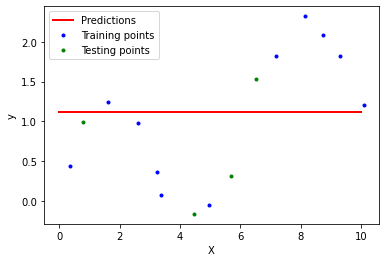

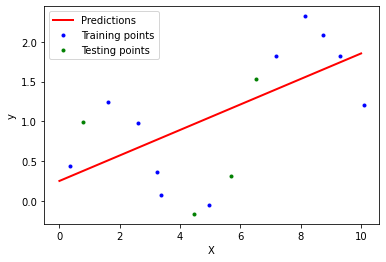

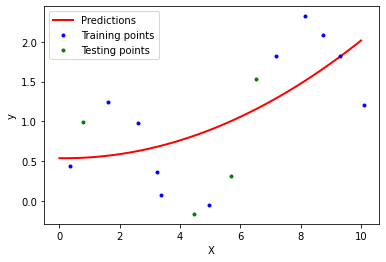

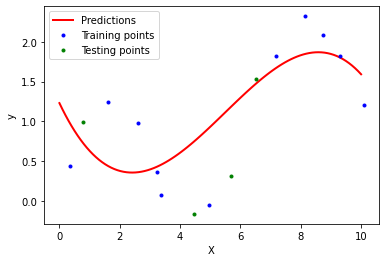

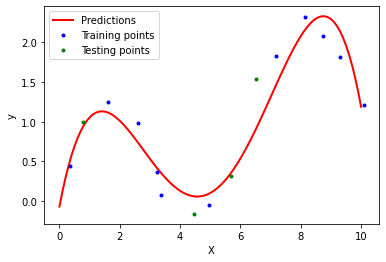

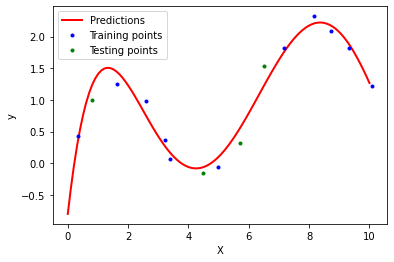

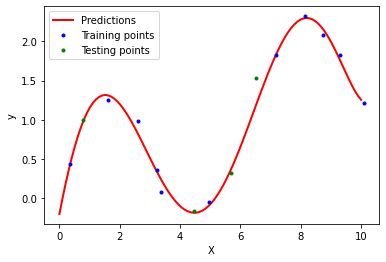

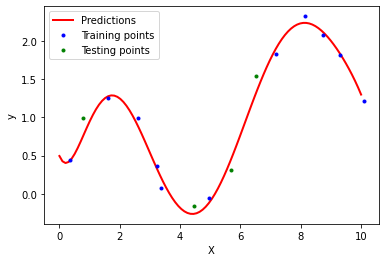

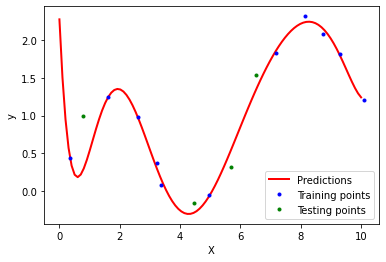

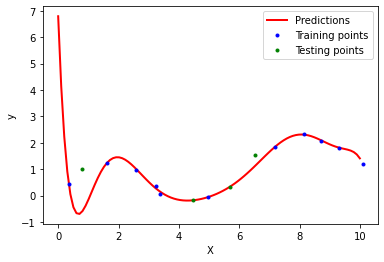

In [176]:
Q3()

In [177]:
print('Underfitting= Degree 0')
print('Overfitting= Degree 9')

Underfitting= Degree 0
Overfitting= Degree 9


In [187]:
#Q4
poly = PolynomialFeatures(degree=12, include_bias=True)
x_train_trans = poly.fit_transform(X_train)
x_test_trans = poly.transform(X_test)
        #include bias parameter
lr = LinearRegression()
linreg=lr.fit(x_train_trans, y_train)
y_pred = lr.predict(x_test_trans)
b=r2_score(y_test, y_pred)
print(b)

-4.311980555741178
